In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
import math

In [3]:
data=pd.read_csv('dataset_candidatura_wr/odometry_dual.txt')
data=data.iloc[:,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','hmm_1','hmm_2','real_cuant','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)


data

,x_w,y_w,th_w,x_1,y_1,th_1,hmm_1,hmm_2,real_cuant,x,y,th,error_w,error_th_w,error_dual,error_th_dual
0,0.446131,0.220399,0.542651,0.447034,0.503635,0.547417,4.0,4.0,4.0,0.449654,0.222232,0.541957,0.003972,0.000694,0.281415,0.005460
1,0.453820,0.224359,0.536151,0.454678,0.507682,0.540917,4.0,4.0,4.0,0.462964,0.228968,0.545379,0.010240,0.009228,0.278836,0.004462
2,0.475809,0.235386,0.568658,0.476964,0.518095,0.573424,4.0,4.0,4.0,0.476346,0.235369,0.567480,0.000538,0.001177,0.282726,0.005944
3,0.489409,0.242514,0.589879,0.490680,0.524998,0.594645,4.0,4.0,4.0,0.489198,0.241823,0.586883,0.000723,0.002996,0.283179,0.007762
4,0.496555,0.246312,0.600142,0.497846,0.528756,0.604908,4.0,4.0,4.0,0.501376,0.248347,0.604593,0.005233,0.004451,0.280432,0.000315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.192866,2.040753,-2.489167,2.488920,3.709293,2.082401,22.0,11.0,11.0,2.374316,2.341280,2.099131,2.202053,4.588298,1.372806,0.016730
2949,0.186816,2.037234,-2.483243,2.486323,3.715794,2.088325,22.0,11.0,11.0,2.369607,2.352374,2.108982,2.205423,4.592225,1.368406,0.020657
2950,0.175570,2.030620,-2.472666,2.481480,3.727908,2.098902,22.0,22.0,11.0,2.364795,2.363409,2.118849,2.214375,4.591515,1.369479,0.019947
2951,0.169579,2.027007,-2.466840,2.478782,3.734362,2.104728,22.0,22.0,11.0,2.359454,2.375315,2.129586,2.217401,4.596427,1.364276,0.024859


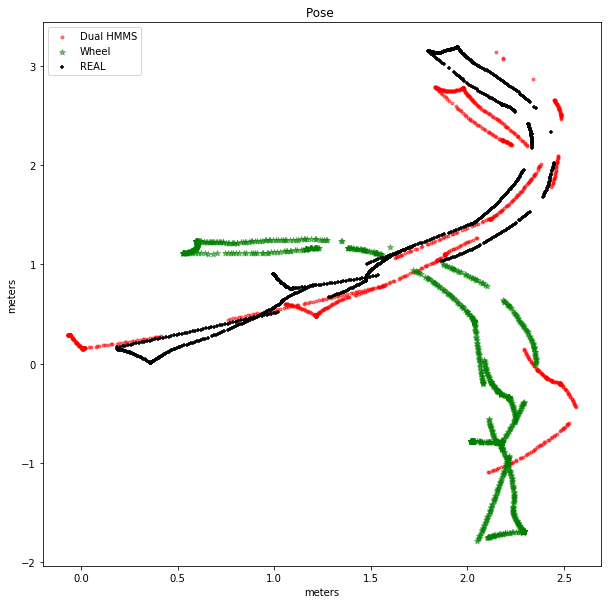

In [63]:
data=pd.read_csv('dataset_candidatura_wr/odometry_dual.txt')
data=data.iloc[::,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','hmm_1','hmm_2','real_cuant','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)



start=700
end=1000

data_s=data
data_s=data.iloc[start:start+end]
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.5,label= 'Dual HMMS')

ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.5,label= 'Wheel')



ax1.scatter(x= data_s.x, y=data_s.y,marker='+',s=20,c='black',label= "REAL")

plt.legend()



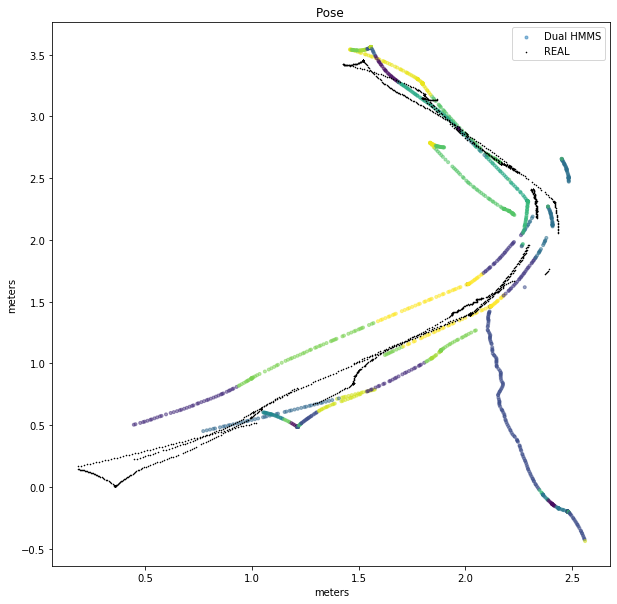

In [53]:
#data_s=data.iloc[start:start+400]
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')

ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c=data_s.hmm_1,alpha=.5,label= 'Dual HMMS')
#ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.15,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


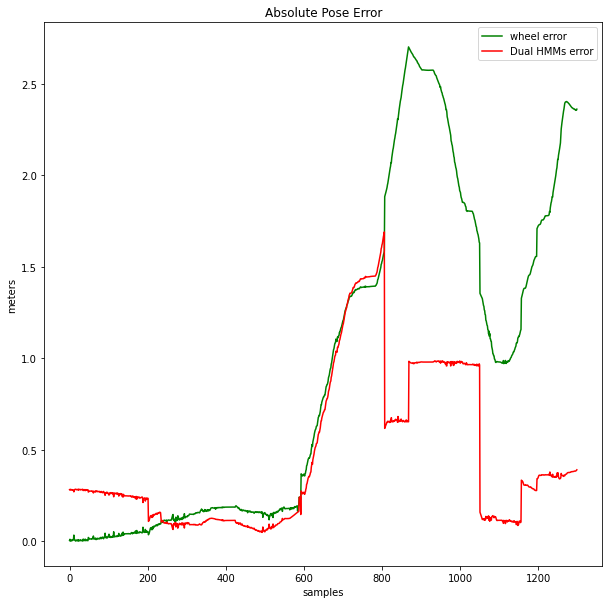

In [54]:

fig = plt.figure(figsize=(10,10))
plt.plot(data_s.error_w,c='green',label='wheel error')
plt.plot(data_s.error_dual,c='red',label='Dual HMMs error')


ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute Pose Error")
ax1.set_ylabel('meters')
ax1.set_xlabel('samples')

ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


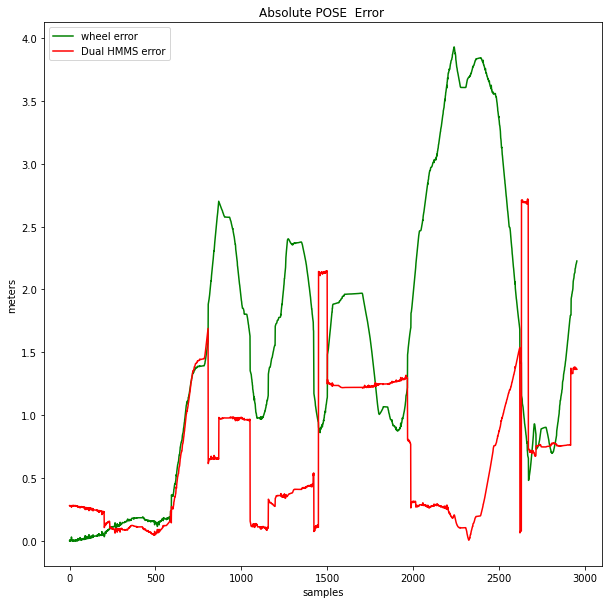

In [55]:
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_dual,c='red',label='Dual HMMS error')


ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute POSE  Error ")
ax1.set_ylabel('meters')
ax1.set_xlabel('samples')

ax1.legend()

In [42]:

lecs=[2,2,2,3,4,5,5]
np.unique(lecs)[-2:]

array([4, 5])

In [43]:
trans=np.load('trans.npy')


In [44]:
ccxyth=np.load('ccxyth.npy')
A=np.load('A.npy')
N=len(A)
N

32

In [11]:
save= False
trans=np.zeros((32, 32, 3))
for i in range (N):
    for j in range (N):
        if (A[i,j]!=0) and (i!=j) :
            
            trans[i,j,:]=   ccxyth[j,:]+ (.5 * (ccxyth[i,:]-ccxyth[j,:]))
            
    

In [12]:
if save:
    np.save('trans.npy',trans)

In [13]:
trans[3,9,:]

array([0., 0., 0.])

In [14]:

ccxyth[3,:]

array([2.2921773 , 3.90248561, 1.70873467])

In [15]:
def path_to_xyth(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    estimated['thcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,2])                                
    return (estimated)
    

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


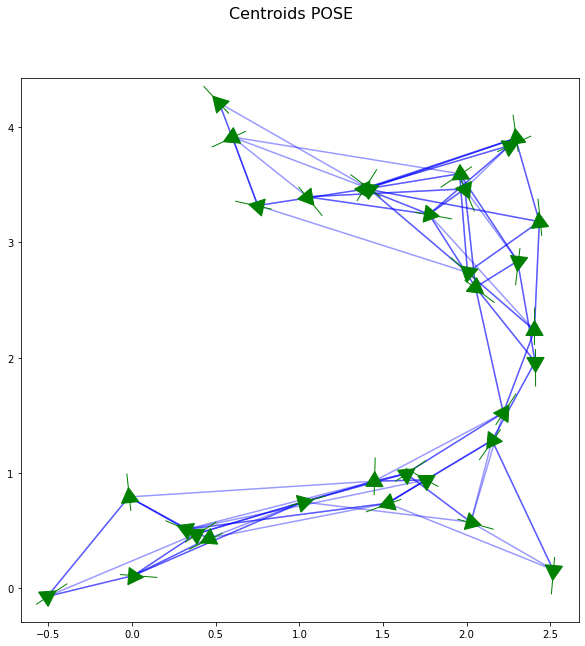

In [16]:
cc=ccxyth



x=np.linspace(0,.4)
fig = plt.figure(figsize=(10,10))
fig.suptitle('Centroids POSE', fontsize=16)
euclD=np.zeros((N,N,1))
ss= np.arange(len(A))
for s1 in ss:
    for s2 in ss:
        if (s1!=s2)and (A[s1,s2]!=0):# and (np.linalg.norm(ccxyth[s1,:2]-ccxyth[s2,:2])<1)   :#and(s1==s or s2==s)
            xvalues=[ccxyth[s1,0],ccxyth[s2,0]]
            yvalues=[ccxyth[s1,1],ccxyth[s2,1]]
            euclD[s1,s2]=np.linalg.norm(ccxyth[s1,:2]-ccxyth[s2,:2])

            ax1 = fig.add_subplot(111)

            plt.plot(xvalues,yvalues ,alpha=.4 ,c='b' )
         
            scatter= ax1.scatter(x= ccxyth[s1,0], y=ccxyth[s1,1],c='b' ,marker='.',s=100)
            scatter= ax1.scatter(x= ccxyth[s2,0], y=ccxyth[s2,1],c='b' ,marker='.',s=100)
            #scatter= ax1.scatter(x= trans[s1,s2,0], y=trans[s1,s2,1],c='b' ,marker='|',s=140)
for c in cc:
        ang=c[2]*180/math.pi
        plt.plot(c[0], c[1], marker=(3, 1,ang - 90 ), markersize=20,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang- 90), markersize=50,c='green', linestyle='--')




In [17]:

def plot_cc_arrow(cc):
    fig=plt.figure(figsize=(10,10))
    for c in cc:
        ang=c[2]*180/math.pi
        

        plt.plot(c[0], c[1], marker=(3, 1,ang + 90 ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang+ 90), markersize=25,c='green', linestyle='--')
        #plt.plot(c[0]-(.01*np.cos(c[2]+.5*math.pi)), c[1]-(.01*np.sin(c[2]+.5*math.pi)), marker=(1, 1,ang), markersize=25,c='blue', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

<Figure size 720x720 with 0 Axes>

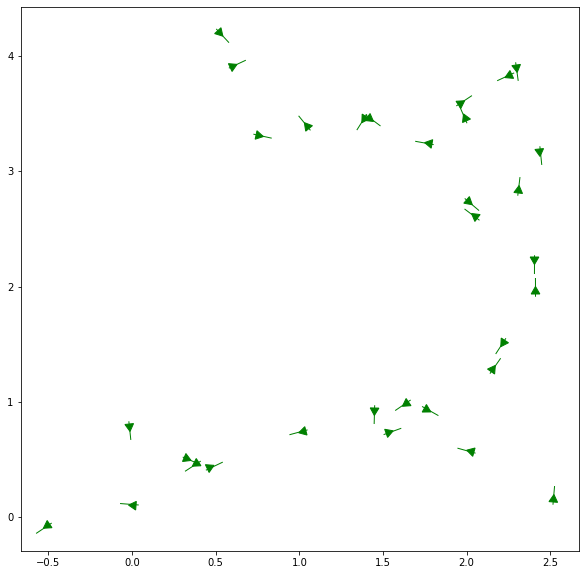

In [18]:
fig=plt.figure(figsize=(10,10))
plot_cc_arrow(cc)


In [19]:
np.where(euclD > 2)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [20]:
euclD[9,14],euclD[14,9]

(array([0.]), array([0.]))

In [21]:
A[14,9]=0

In [22]:
#np.save('A.npy',A)